In [128]:
import pandas as pd
import numpy as np


# Reading the data

In [129]:
Air_df=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',sep='\s+',names=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market_share','price'])

In [130]:
Air_df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [131]:
Air_df.shape

(1000, 11)

# Removing the Outliers

In [132]:
Q1=Air_df.quantile(0.25)
Q3=Air_df.quantile(0.75)
IQR=Q3-Q1
IQR

Average Fare                  71.4175
Distance                     899.0000
Average weekly passengers    512.7150
market share                  27.0000
Average fare                  78.8925
market_share                  39.7775
price                         54.7625
dtype: float64

In [133]:
Min_cap=Q1-1.5*IQR
Max_cap=Q3+1.5*IQR


In [134]:
Min_cap

Average Fare                  18.84875
Distance                    -795.00000
Average weekly passengers   -511.87500
market share                   6.01000
Average fare                   5.74625
market_share                 -46.47125
price                         31.62375
dtype: float64

In [135]:
Max_cap

Average Fare                  304.51875
Distance                     2801.00000
Average weekly passengers    1538.98500
market share                  114.01000
Average fare                  321.31625
market_share                  112.63875
price                         250.67375
dtype: float64

In [136]:
for i,j,k in zip(Min_cap.index.tolist(),Min_cap,Max_cap):
     Air_df=Air_df[((Air_df[i]>j) & (Air_df[i]<k))] 
    


In [137]:
Air_df.shape

(885, 11)

In [138]:
# Q1=Sales_data.quantile(0.25)
# Q3=Sales_data.quantile(0.75)
# IQR=Q3-Q1
# IQR

In [139]:
# Min_cap=Q1-1.5*IQR
# Max_cap=Q3+1.5*IQR


In [140]:
# Min_cap

In [141]:
# Max_cap

In [142]:
# for i,j,k in zip(Min_cap.index.tolist(),Min_cap,Max_cap):
#      Sales_data=Sales_data[((Sales_data[i]>j) & (Sales_data[i]<k))] 
    

In [143]:
# Sales_data.shape

In [144]:
# import matplotlib.pyplot as plt
# plt.boxplot(Sales_data['Distance'])
# plt.show()

# separating variables independent and dependent

In [145]:
Target=Air_df['Average Fare']

In [146]:
Feature=Air_df.drop('Average Fare',axis=1)

In [147]:
Feature.head()

,City1,City2,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market_share,price
0,CAK,ATL,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Remove the variables which has <0.1 correaltion with dependent variable

In [148]:
corr_df=(Air_df.corr()['Average Fare']>0.1)
print(corr_df)
drop_col=corr_df[corr_df==False].index
drop_col

Average Fare                  True
Distance                      True
Average weekly passengers    False
market share                 False
Average fare                  True
market_share                 False
price                         True
Name: Average Fare, dtype: bool


Index(['Average weekly passengers', 'market share', 'market_share'], dtype='object')

In [149]:
Feature=Feature.drop(columns=drop_col)


In [150]:
Feature.head()

,City1,City2,Distance,market leading airline,Average fare,Low price airline,price
0,CAK,ATL,528,FL,111.03,FL,111.03
1,CAK,MCO,860,FL,123.09,DL,118.94
2,ALB,ATL,852,DL,223.98,CO,167.12
3,ALB,BWI,288,WN,68.86,WN,68.86
4,ALB,ORD,723,UA,161.36,WN,145.42


In [151]:

Feature.shape

(885, 7)

# Creating scatter plot

## Please help me with how to draw scatter plot 

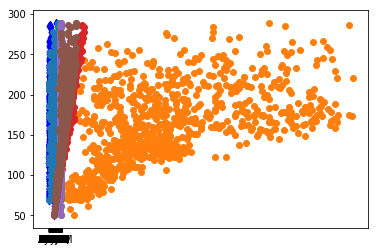

In [152]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(Feature['City1'],Target,c='b',marker='d')
ax.scatter(Feature['City2'],Target)
ax.scatter(Feature['Distance'],Target)
ax.scatter(Feature['market leading airline'],Target)
ax.scatter(Feature['Average fare'],Target)
ax.scatter(Feature['Low price airline'],Target)
ax.scatter(Feature['price'],Target)

# Working with categorical variables

In [153]:
Feature["From_To"]=Feature['City1']+"-"+Feature['City2']

In [154]:
Feature=Feature.drop(columns=['City1','City2'])

In [155]:
Feature.insert(0,'From-To',Feature['From_To'])

In [156]:
Feature=Feature.drop(columns='From_To')

In [157]:
Feature.head()


,From-To,Distance,market leading airline,Average fare,Low price airline,price
0,CAK-ATL,528,FL,111.03,FL,111.03
1,CAK-MCO,860,FL,123.09,DL,118.94
2,ALB-ATL,852,DL,223.98,CO,167.12
3,ALB-BWI,288,WN,68.86,WN,68.86
4,ALB-ORD,723,UA,161.36,WN,145.42


# LabelEncoding for From-TO columns

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(Feature['From-To'])

LabelEncoder()

In [159]:
Feature['From-To']=le.transform(Feature['From-To'])

In [160]:
Feature.head()

,From-To,Distance,market leading airline,Average fare,Low price airline,price
0,241,528,FL,111.03,FL,111.03
1,242,860,FL,123.09,DL,118.94
2,22,852,DL,223.98,CO,167.12
3,23,288,WN,68.86,WN,68.86
4,28,723,UA,161.36,WN,145.42


# Get dummies for remaning two categorical variables

In [161]:
Feature=pd.get_dummies(Feature)

In [162]:
Feature.head()


,From-To,Distance,Average fare,price,market leading airline_AA,market leading airline_AS,market leading airline_B6,market leading airline_CO,market leading airline_DL,market leading airline_F9,...,Low price airline_G4,Low price airline_HP,Low price airline_NK,Low price airline_NW,Low price airline_SY,Low price airline_TZ,Low price airline_UA,Low price airline_US,Low price airline_WN,Low price airline_YX
0,241,528,111.03,111.03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,242,860,123.09,118.94,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,852,223.98,167.12,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,23,288,68.86,68.86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,723,161.36,145.42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Split the data

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Feature,Target,random_state=1)

In [164]:
X_train.shape

(663, 38)

In [165]:
X_test.shape

(222, 38)

In [166]:
y_train.shape

(663,)

In [167]:
y_test.shape

(222,)

# Printing coefficients and intercept


In [168]:
from sklearn.linear_model import LinearRegression
Regression_model=LinearRegression()
Regression_model.fit(X_train,y_train)
Regression_model.coef_

array([ 1.86120468e-03,  1.82709723e-03,  7.68407951e-01,  1.91286016e-01,
       -7.67877606e-01, -5.62448191e+00,  1.34127174e+01, -6.75236127e+00,
       -1.21911579e+00,  1.52891657e+01,  1.40799703e+00,  6.21724894e-15,
       -5.46085801e+00,  4.47750241e+00, -2.24636752e+00,  4.97044651e+00,
       -8.72776868e+00, -1.73213998e+00, -2.97782904e+00, -4.04902919e+00,
        1.38096739e+00,  3.28922685e+00,  1.00266139e+01, -1.02884763e+01,
        3.94152616e+00,  6.96562511e-01, -1.59988346e+00, -1.43365442e+00,
       -9.76996262e-15,  5.73788014e-01, -5.37438593e+00,  2.45739990e+00,
       -5.27736708e+00, -3.87164717e+00,  1.20318322e+00,  2.60336774e+00,
        9.66891636e-01,  7.05887005e-01])

In [169]:
Regression_model.intercept_

7.280195167785848

In [170]:
ypred=Regression_model.predict(X_test)

In [171]:
ypred.shape

(222,)

In [172]:
y_test.shape

(222,)

In [173]:
Regression_model.score(X_train,y_train)

0.9746855094036221

In [174]:
from sklearn.metrics import r2_score
r2_score(y_test,ypred)

0.9752865547201635